<a href="https://colab.research.google.com/github/thanawat150/GeoAI/blob/main/Material/Day%202/Excercise/CNN/CNNLandcover_v3-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the file from here and upload it in your google drive
[https://drive.google.com/file/d/10x-39P6o6QA9-BVnlnxDVib23rbMlHGL/view?usp=drive_link](https://drive.google.com/file/d/10x-39P6o6QA9-BVnlnxDVib23rbMlHGL/view?usp=drive_link)

In [90]:
from google.colab import drive
# from google.colab import drive เป็นการนำเข้า (import) ไลบรารีที่จำเป็น
# เพื่อให้สามารถใช้งานฟีเจอร์ต่างๆ ของ Google Colab ได้
drive.mount('/content/drive')
# drive.mount('/content/drive') เป็นคำสั่งที่ใช้สำหรับเชื่อมต่อ
# Google Colab เข้ากับ Google Drive ของเรา ทำให้เราสามารถเข้าถึงและจัดการไฟล์ต่างๆ
# ใน Google Drive ได้โดยตรงจาก Colab ซึ่งสะดวกมากสำหรับการทำงานกับชุดข้อมูลขนาดใหญ่

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
! cp /content/drive/MyDrive/GeoAi/LCData.zip LCData.zip
# ! cp /content/drive/MyDrive/LCData.zip LCData.zip เป็นคำสั่งที่ใช้คัดลอกไฟล์
# จาก Google Drive มายังเครื่องคอมพิวเตอร์ (Google Colab) เพื่อให้สามารถ
# เข้าถึงและใช้งานไฟล์นั้นได้รวดเร็วกว่าการเรียกใช้จาก Drive โดยตรง
# ซึ่งจะช่วยให้การทำงานของโค้ดมีประสิทธิภาพและเสถียรมากขึ้น
# พยายามอย่าวรรค
# โหลดข้อมูล อัพขึ้น Drive ดึงเข้า path แก้ Path กดรัน

In [93]:
!unzip -q LCData.zip -d ./LCData
# !unzip -q LCData.zip -d ./LCData เป็นคำสั่งที่ใช้แตกไฟล์ (unzip)
# ไฟล์ที่ชื่อว่า LCData.zip โดยที่ -q ย่อมาจาก "quiet" เพื่อไม่ให้แสดงผลลัพธ์
# ระหว่างการแตกไฟล์ และ -d ./LCData เป็นการกำหนดปลายทางให้แตกไฟล์ไปไว้ในโฟลเดอร์ชื่อ LCData
# ซึ่งช่วยจัดระเบียบไฟล์ข้อมูลให้เป็นระเบียบและง่ายต่อการเรียกใช้งาน

replace ./LCData/Val/Rural/images_png/2522.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [94]:
# English: Install the 'segmentation-models' library.
# Thai: ติดตั้งไลบรารี 'segmentation-models'
# Thai: ไลบรารีนี้มีไว้สำหรับงาน Image Segmentation โดยเฉพาะ โดยมีโมเดลและโครงสร้างเครือข่ายสำเร็จรูปให้เลือกใช้มากมาย ซึ่งช่วยลดเวลาในการเขียนโค้ดและทำให้การพัฒนาง่ายขึ้น
!pip install segmentation-models -q

In [98]:
#import Necessary Libraries
import os
# English: This library allows interaction with the operating system, useful for tasks like managing file paths.
# ภาษาไทย: ไลบรารีนี้จำเป็นสำหรับการจัดการกับระบบไฟล์ เช่น การระบุที่อยู่ของไฟล์หรือโฟลเดอร์ในคอมพิวเตอร์

import numpy as np
# English: A fundamental library for numerical operations, especially for working with arrays and matrices.
# ภาษาไทย: NumPy เป็นไลบรารีพื้นฐานสำหรับการคำนวณทางคณิตศาสตร์ที่ซับซ้อนและมีประสิทธิภาพสูง โดยเฉพาะอย่างยิ่งกับการจัดการข้อมูลที่เป็นตัวเลขในรูปแบบของ Array ซึ่งเป็นรูปแบบที่ใช้กันมากในงาน AI และ Machine Learning

import matplotlib.pyplot as plt
# English: Used for creating static, animated, and interactive visualizations in Python.
# ภาษาไทย: Matplotlib ใช้สำหรับสร้างกราฟและภาพต่างๆ เพื่อช่วยให้เราเห็นภาพรวมของข้อมูลและผลลัพธ์ของโมเดลได้ชัดเจนขึ้น

from skimage.io import imread
# English: A function from the scikit-image library to read images from files.
# ภาษาไทย: ใช้สำหรับอ่านไฟล์รูปภาพจากที่เก็บข้อมูลในคอมพิวเตอร์ เพื่อนำรูปภาพมาประมวลผลต่อ

from skimage.transform import resize
# English: Used to resize images to a desired dimension, which is often a requirement for deep learning models.
# ภาษาไทย: ใช้สำหรับปรับขนาดรูปภาพให้มีขนาดเท่ากันทั้งหมด ซึ่งเป็นสิ่งจำเป็นเพราะโมเดล AI มักจะรับข้อมูลเข้าที่มีขนาดเท่ากันเท่านั้น

from sklearn.model_selection import train_test_split
# English: A function to split arrays or matrices into random train and test subsets.
# ภาษาไทย: ใช้สำหรับแบ่งข้อมูลออกเป็น 3 ชุด ได้แก่ ชุดฝึก ชุดตรวจสอบ และชุดทดสอบ เพื่อให้โมเดลเรียนรู้จากข้อมูลชุดหนึ่ง และทดสอบกับข้อมูลที่ไม่เคยเห็นมาก่อน ซึ่งช่วยป้องกันการ Overfitting

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# English: These are functions for evaluating model performance by generating reports, confusion matrices, and accuracy scores.
# ภาษาไทย: ใช้สำหรับวัดและประเมินประสิทธิภาพของโมเดล โดยจะสร้างรายงานผลลัพธ์, ตารางความสับสน (Confusion Matrix), และค่าความแม่นยำ (Accuracy) เพื่อให้เราทราบว่าโมเดลของเราทำงานได้ดีแค่ไหน

import seaborn as sns
# English: A library for creating statistical graphics, often used with matplotlib for more aesthetically pleasing plots.
# ภาษาไทย: ใช้สำหรับสร้างกราฟทางสถิติที่สวยงามและอ่านง่าย ช่วยให้การวิเคราะห์ผลลัพธ์ของโมเดลทำได้ดียิ่งขึ้น

import tensorflow as tf
# English: An open-source machine learning framework for building and training neural networks.
# ภาษาไทย: TensorFlow เป็นเฟรมเวิร์กหลักที่ใช้สำหรับสร้างและฝึกโมเดล AI ทั้งหมดในโปรเจกต์นี้

from tensorflow.keras.utils import to_categorical
# English: A utility function to convert class vectors to binary class matrices (one-hot encoding).
# ภาษาไทย: ใช้สำหรับแปลงข้อมูลให้อยู่ในรูปแบบ One-Hot Encoding ซึ่งเป็นรูปแบบที่เหมาะสมสำหรับโมเดล AI ในงาน Classification

os.environ["SM_FRAMEWORK"] = "tf.keras"
# English: Sets the backend for the segmentation_models library to use TensorFlow/Keras.
# ภาษาไทย: บรรทัดนี้เป็นการกำหนดให้ไลบรารี segmentation_models ทำงานร่วมกับ TensorFlow/Keras ซึ่งเป็นสิ่งจำเป็นเพื่อให้ไลบรารีทั้งสองทำงานร่วมกันได้

import segmentation_models as sm
from segmentation_models import Unet
# English: These lines import the segmentation_models library and the specific U-Net model from it, providing a pre-built architecture for image segmentation.
# ภาษาไทย: เป็นการนำเข้าไลบรารีที่รวบรวมโมเดลสำหรับการแบ่งส่วนภาพ (Image Segmentation) สำเร็จรูปมาให้ใช้ ซึ่งช่วยให้เราสามารถสร้างโมเดลที่มีประสิทธิภาพได้อย่างรวดเร็ว

import keras
keras.backend.set_image_data_format("channels_last")
# English: This line configures Keras to use the "channels_last" data format (height, width, channels), which is the standard format for TensorFlow.
# ภาษาไทย: บรรทัดนี้เป็นการกำหนดรูปแบบการจัดเรียงข้อมูลรูปภาพให้เป็น 'channels_last' เพื่อให้มั่นใจว่าข้อมูลที่ป้อนเข้าโมเดลจะอยู่ในรูปแบบที่ถูกต้องตามที่ TensorFlow ต้องการ

In [99]:
data_dir = "/content/LCData/Val/Urban"
# English: This line defines the path to the main directory where the validation dataset is stored.
# ภาษาไทย: บรรทัดนี้เป็นการกำหนดที่อยู่ของโฟลเดอร์หลักที่เก็บชุดข้อมูลสำหรับการตรวจสอบ (validation) ซึ่งช่วยให้โค้ดสามารถเข้าถึงข้อมูลได้อย่างถูกต้องและรวดเร็ว

image_dir = os.path.join(data_dir, "images_png")
# English: This creates the full path to the subdirectory containing the image files.
# ภาษาไทย: เป็นการสร้างที่อยู่แบบเต็มสำหรับโฟลเดอร์ย่อยที่เก็บรูปภาพ โดยใช้ os.path.join เพื่อเชื่อมต่อที่อยู่หลักกับชื่อโฟลเดอร์ย่อยเข้าด้วยกันอย่างถูกต้องตามระบบปฏิบัติการ

mask_dir = os.path.join(data_dir, "masks_png")
# English: This creates the full path to the subdirectory containing the mask files.
# ภาษาไทย: เป็นการสร้างที่อยู่แบบเต็มสำหรับโฟลเดอร์ย่อยที่เก็บไฟล์ mask หรือภาพที่ระบุการแบ่งส่วนของวัตถุต่างๆ ซึ่งจะถูกนำไปใช้เป็นคำตอบที่ถูกต้องในการฝึกโมเดล

X, y = [], []
# English: These lines initialize two empty lists, X and y, which will be used to store the loaded images and their corresponding masks, respectively.
# ภาษาไทย: เป็นการสร้างลิสต์ว่างเปล่า 2 อัน คือ X และ y เพื่อใช้เป็นตัวแปรสำหรับเก็บรูปภาพและ mask ที่จะถูกอ่านเข้ามาในภายหลัง

In [100]:
# Select subset of images to keep runtime reasonable
max_images = 900
# English: This variable limits the number of images processed to a manageable amount, making the code run faster.
# ภาษาไทย: เป็นการกำหนดจำนวนรูปภาพสูงสุดที่จะนำมาใช้เพื่อประหยัดเวลาในการประมวลผลและลดการใช้ทรัพยากรคอมพิวเตอร์ ซึ่งมีประโยชน์อย่างยิ่งเมื่อชุดข้อมูลมีขนาดใหญ่มาก

target_size = (128, 128)
# English: This variable sets the desired size for all images, ensuring they have a uniform input dimension for the neural network.
# ภาษาไทย: เป็นการกำหนดขนาดของรูปภาพที่จะถูกปรับให้มีขนาดเท่ากันทั้งหมด (128x128 พิกเซล) เพื่อให้สอดคล้องกับข้อกำหนดของโมเดล AI ที่ต้องใช้ข้อมูลป้อนเข้าที่มีขนาดเท่ากัน

images = []
# English: Initializes an empty list to store the resized image data.
# ภาษาไทย: เป็นการสร้างลิสต์ว่างเปล่าเพื่อใช้เก็บรูปภาพที่ถูกปรับขนาดแล้ว ซึ่งจะถูกนำไปใช้เป็นข้อมูลสำหรับการฝึกโมเดล

masks = []
# English: Initializes an empty list to store the corresponding resized mask data.
# ภาษาไทย: เป็นการสร้างลิสต์ว่างเปล่าเพื่อใช้เก็บไฟล์ mask ที่ถูกปรับขนาดแล้ว โดยจะใช้เป็นข้อมูลที่ถูกต้องสำหรับโมเดลในการเรียนรู้

for i, fname in enumerate(os.listdir(image_dir)):
# English: This loop iterates through the list of filenames in the image directory.
# ภาษาไทย: เป็นคำสั่งวนซ้ำเพื่ออ่านชื่อไฟล์รูปภาพทีละไฟล์ในโฟลเดอร์ที่กำหนด เพื่อนำมาประมวลผลทีละภาพ

    if not fname.endswith(".png"):
        continue
# English: This condition skips any files that are not in the PNG format, ensuring only the correct file types are processed.
# ภาษาไทย: เป็นการตรวจสอบว่าไฟล์ที่กำลังประมวลผลอยู่เป็นไฟล์ประเภท .png หรือไม่ ซึ่งจำเป็นต้องทำเพื่อหลีกเลี่ยงข้อผิดพลาดจากการพยายามอ่านไฟล์ที่ไม่ใช่รูปภาพ

    if i >= max_images:
        break
# English: This condition stops the loop once the maximum number of images is reached, helping to keep the runtime manageable.
# ภาษาไทย: เป็นการตรวจสอบว่าจำนวนรูปภาพที่อ่านเข้ามาถึงค่าสูงสุดที่กำหนดไว้หรือไม่ หากถึงแล้วก็จะหยุดการทำงานทันทีเพื่อไม่ให้ประมวลผลมากเกินไป

    img = imread(os.path.join(image_dir, fname))
# English: Reads the image file from the specified path.
# ภาษาไทย: ใช้คำสั่ง imread เพื่ออ่านรูปภาพจากที่อยู่ไฟล์ที่กำหนด ซึ่งเป็นขั้นตอนแรกของการนำรูปภาพเข้ามาในโปรแกรม

    mask = imread(os.path.join(mask_dir, fname))
# English: Reads the corresponding mask file from the specified path.
# ภาษาไทย: ใช้คำสั่ง imread เพื่ออ่านไฟล์ mask ที่มีชื่อเดียวกันกับรูปภาพ ซึ่งเป็นไฟล์ที่ระบุคำตอบที่ถูกต้องสำหรับแต่ละรูปภาพ

    img_resized = resize(img, target_size, anti_aliasing=True, preserve_range=True).astype(np.uint8)
# English: Resizes the image to the target size while preserving its color range and reducing artifacts.
# ภาษาไทย: เป็นการปรับขนาดของรูปภาพให้มีขนาดตามที่กำหนดไว้ (128x128) พร้อมทั้งปรับคุณภาพของภาพให้คมชัดขึ้นโดยใช้เทคนิค anti-aliasing และรักษาช่วงค่าสีเดิมไว้

    mask_resized = resize(mask, target_size, order=0, preserve_range=True, anti_aliasing=False).astype(np.uint8)
# English: Resizes the mask to the target size using nearest-neighbor interpolation (order=0) to ensure the pixel values remain as integers representing different classes.
# ภาษาไทย: เป็นการปรับขนาดของไฟล์ mask ให้มีขนาดเท่ากับรูปภาพ โดยใช้เทคนิคการปรับขนาดแบบ nearest-neighbor (order=0) ซึ่งจะช่วยให้ค่าตัวเลขของแต่ละพิกเซลใน mask ไม่เปลี่ยนแปลง ซึ่งเป็นสิ่งสำคัญเพราะแต่ละตัวเลขแทนคลาสที่แตกต่างกัน

    images.append(img_resized)
# English: Appends the resized image to the 'images' list.
# ภาษาไทย: เป็นการเพิ่มรูปภาพที่ถูกปรับขนาดแล้วเข้าไปในลิสต์ 'images' เพื่อเตรียมนำไปสร้างเป็นชุดข้อมูล

    masks.append(mask_resized)
# English: Appends the resized mask to the 'masks' list.
# ภาษาไทย: เป็นการเพิ่มไฟล์ mask ที่ถูกปรับขนาดแล้วเข้าไปในลิสต์ 'masks' เพื่อเตรียมนำไปใช้เป็นคำตอบที่ถูกต้อง

images = np.array(images)  # shape (N,H,W,3)
# English: Converts the 'images' list into a NumPy array, which is a more efficient data structure for numerical operations and is the required format for TensorFlow.
# ภาษาไทย: เป็นการแปลงลิสต์ 'images' ให้เป็น NumPy array ซึ่งเป็นรูปแบบข้อมูลที่เหมาะสมสำหรับการคำนวณและประมวลผลด้วยโมเดล AI

masks = np.array(masks)    # shape (N,H,W)
# English: Converts the 'masks' list into a NumPy array, which is the required data type for subsequent preprocessing steps.
# ภาษาไทย: เป็นการแปลงลิสต์ 'masks' ให้เป็น NumPy array ซึ่งเป็นรูปแบบข้อมูลที่เหมาะสมสำหรับขั้นตอนการเตรียมข้อมูลในลำดับถัดไป

print("Images shape:", images.shape)
# English: Prints the shape of the 'images' array to verify the number of images, height, width, and channels.
# ภาษาไทย: เป็นการแสดงขนาดของอาเรย์ 'images' เพื่อให้เราตรวจสอบว่ามีจำนวนรูปภาพ ความกว้าง ความสูง และจำนวนแชนแนล (สี) ตามที่เราคาดหวังหรือไม่

print("Masks shape:", masks.shape)
# English: Prints the shape of the 'masks' array to verify the number of masks, height, and width.
# ภาษาไทย: เป็นการแสดงขนาดของอาเรย์ 'masks' เพื่อให้เราตรวจสอบว่ามีจำนวน mask, ความกว้าง และความสูง ตามที่เราต้องการหรือไม่


Images shape: (677, 128, 128, 3)
Masks shape: (677, 128, 128)


In [101]:
images = np.array(images)  # shape (N,H,W,3)
# English: This line converts the 'images' list into a NumPy array, which is a more efficient and standard data structure for machine learning models.
# ภาษาไทย: เป็นการแปลงลิสต์ของรูปภาพให้กลายเป็น NumPy array ซึ่งเป็นรูปแบบข้อมูลที่เหมาะสมสำหรับการประมวลผลด้วยโมเดล AI เพราะช่วยให้การคำนวณต่างๆ รวดเร็วและมีประสิทธิภาพมากขึ้น

masks = np.array(masks)    # shape (N,H,W)
# English: This line converts the 'masks' list into a NumPy array, preparing it for subsequent preprocessing steps.
# ภาษาไทย: เป็นการแปลงลิสต์ของไฟล์ mask ให้กลายเป็น NumPy array เพื่อให้ข้อมูลอยู่ในรูปแบบที่ถูกต้องและพร้อมใช้งานสำหรับขั้นตอนถัดไป เช่น การแปลงเป็น one-hot encoding

print("Images shape:", images.shape)
# English: This prints the dimensions of the 'images' array to verify the number of images (N), height (H), width (W), and color channels (3).
# ภาษาไทย: เป็นการแสดงขนาดของอาเรย์ 'images' เพื่อตรวจสอบว่าข้อมูลรูปภาพมีจำนวน ความสูง ความกว้าง และจำนวนช่องสี (RGB) ตามที่เราต้องการ ซึ่งช่วยให้เรามั่นใจว่าข้อมูลถูกโหลดมาอย่างถูกต้อง

print("Masks shape:", masks.shape)
# English: This prints the dimensions of the 'masks' array to verify the number of masks (N), height (H), and width (W).
# ภาษาไทย: เป็นการแสดงขนาดของอาเรย์ 'masks' เพื่อตรวจสอบว่าข้อมูล mask มีจำนวน ความสูง และความกว้าง ตามที่เราคาดหวัง ซึ่งเป็นสิ่งสำคัญเพื่อให้ข้อมูลรูปภาพและ mask มีมิติที่สอดคล้องกัน

Images shape: (677, 128, 128, 3)
Masks shape: (677, 128, 128)


In [102]:
# --- 3. Preprocess ---
# Normalize images
images = images
# ภาษาไทย: การทำ Normalize images เป็นขั้นตอนที่ทำให้ค่าพิกเซลของรูปภาพอยู่ในช่วงที่กำหนด เช่น 0-1 เพื่อให้โมเดล AI เรียนรู้ได้ดีขึ้นและเร็วขึ้น

num_classes = 8
# Convert masks to categorical one-hot
masks_cat = to_categorical(masks, num_classes=num_classes)  # shape (N,H,W,C)
# ภาษาไทย: บรรทัดนี้เป็นการแปลงข้อมูล mask (ภาพที่ระบุตำแหน่งของแต่ละวัตถุ) ให้เป็นรูปแบบ one-hot encoding ซึ่งเป็นรูปแบบที่เหมาะกับการฝึกโมเดล AI ในงาน Segmentation โดยจะเปลี่ยนข้อมูลจากค่าตัวเลข 0, 1, 2... สำหรับแต่ละคลาส ไปเป็นเวกเตอร์ที่มีค่าเป็น 1 ที่ตำแหน่งของคลาสนั้นๆ และ 0 ที่ตำแหน่งอื่น ๆ ซึ่งช่วยให้โมเดลแยกแยะแต่ละคลาสได้อย่างแม่นยำ

# Split train/test/val
X_train, X_temp, y_train, y_temp = train_test_split(images, masks_cat, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# ภาษาไทย: การแบ่งชุดข้อมูลเป็น ชุดฝึก (train), ชุดตรวจสอบ (validation) และ ชุดทดสอบ (test) เป็นขั้นตอนสำคัญเพื่อป้องกันปัญหา overfitting (โมเดลเรียนรู้ข้อมูลฝึกได้แม่นยำเกินไปแต่ไม่สามารถทำงานได้ดีกับข้อมูลใหม่) และเพื่อประเมินประสิทธิภาพที่แท้จริงของโมเดล

print("Training shape:", X_train.shape, y_train.shape)
# ภาษาไทย: บรรทัดนี้ใช้เพื่อแสดงขนาด (shape) ของชุดข้อมูลการฝึก เพื่อตรวจสอบว่าข้อมูลถูกแบ่งและเตรียมพร้อมสำหรับนำไปใช้ฝึกโมเดลอย่างถูกต้องหรือไม่

Training shape: (473, 128, 128, 3) (473, 128, 128, 8)


In [36]:
# --- 4. Define U-Net model ---
model = Unet(
    backbone_name="resnet18",
    classes=8,
    activation="sigmoid",
    encoder_weights=None,
    input_shape=(128, 128, 3),
)
# ภาษาไทย: บรรทัดนี้เป็นการสร้างโมเดล U-Net ซึ่งเป็นสถาปัตยกรรมที่ใช้สำหรับงาน Image Segmentation โดยมีส่วนประกอบที่สำคัญดังนี้:
# - backbone_name="resnet18": เป็นการใช้โครงสร้างพื้นฐาน ResNet18 ที่ถูกฝึกมาแล้ว ทำให้โมเดลเรียนรู้ได้ดีขึ้น
# - classes=8: กำหนดจำนวนคลาสที่ต้องการจำแนก
# - activation="sigmoid": ใช้ฟังก์ชัน sigmoid เพื่อแปลงค่าผลลัพธ์ให้อยู่ในช่วง 0-1
# - input_shape=(128, 128, 3): กำหนดขนาดของภาพที่ป้อนเข้าโมเดล (กว้าง 128, สูง 128, 3 แชนแนลสี)

model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# ภาษาไทย: เป็นขั้นตอนการกำหนดค่าต่างๆ ให้กับโมเดลก่อนการฝึก
# - optimizer: "Adam" เป็นตัวช่วยในการปรับปรุงโมเดลให้เรียนรู้ได้ดีขึ้น
# - loss: "categorical_crossentropy" ใช้สำหรับคำนวณความแตกต่างระหว่างผลลัพธ์ที่ทำนายได้กับผลลัพธ์จริง
# - metrics: "accuracy" ใช้ในการวัดประสิทธิภาพของโมเดล

model.summary()
# ภาษาไทย: บรรทัดนี้แสดงสรุปโครงสร้างของโมเดลทั้งหมด เพื่อให้เราตรวจสอบรายละเอียดของแต่ละชั้น (layer) ได้

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ data (InputLayer)   │ (None, 128, 128,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_data             │ (None, 128, 128,  │          9 │ data[0][0]        │
│ (BatchNormalizatio… │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 134, 134,  │          0 │ bn_data[0][0]     │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv0 (Conv2D)      │ (None, 64, 64,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn0                 │ (None, 64, 64,    │        256 │ conv0[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ relu0 (Activation)  │ (None, 64, 64,    │          0 │ bn0[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 66, 66,    │          0 │ relu0[0][0]       │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pooling0            │ (None, 32, 32,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stage1_unit1_bn1    │ (None, 32, 32,    │        256 │ pooling0[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stage1_unit1_relu1  │ (None, 32, 32,    │          0 │ stage1_unit1_bn1… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 34, 34,    │          0 │ stage1_unit1_rel… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stage1_unit1_conv1  │ (None, 32, 32,    │     36,864 │ zero_padding2d_2… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stage1_unit1_bn2    │ (None, 32, 32,    │        256 │ stage1_unit1_con… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stage1_unit1_relu2  │ (None, 32, 32,    │          0 │ stage1_unit1_bn2… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 34, 34,    │          0 │ stage1_unit1_rel… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stage1_unit1_conv2  │ (None, 32, 32,    │     36,864 │ zero_padding2d_3… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stage1_unit1_sc     │ (None, 32, 32,    │      4,096 │ stage1_unit1_rel

 Total params: 14,341,585 (54.71 MB)

 Trainable params: 14,331,659 (54.67 MB)

 Non-trainable params: 9,926 (38.77 KB)

In [104]:
# --- 5. Train ---
history = model.fit(X_train, y_train,
# English: This line initiates the training process for the neural network model using the training data (X_train) and their corresponding labels (y_train).
# ภาษาไทย: บรรทัดนี้คือคำสั่งในการเริ่มฝึกโมเดล AI ที่เราสร้างขึ้นมา โดยใช้ข้อมูลรูปภาพ (X_train) และข้อมูล mask ที่เป็นคำตอบ (y_train) ซึ่งเป็นขั้นตอนหลักที่โมเดลจะเรียนรู้จากข้อมูล

                    validation_data=(X_val, y_val),
# English: This argument specifies the validation dataset that the model will use to evaluate its performance on unseen data after each training epoch.
# ภาษาไทย: เป็นการกำหนดชุดข้อมูลสำหรับการตรวจสอบ (X_val และ y_val) ที่จะใช้ในการประเมินประสิทธิภาพของโมเดลในแต่ละรอบการฝึก (epoch) โดยโมเดลจะใช้ข้อมูลชุดนี้เพื่อดูว่ามันเรียนรู้ได้ดีแค่ไหนกับข้อมูลที่ไม่เคยเห็นมาก่อน

                    batch_size=8,
# English: This parameter defines the number of samples (images and masks) that will be processed in one training iteration before updating the model's weights.
# ภาษาไทย: เป็นการกำหนดจำนวนรูปภาพที่จะนำมาประมวลผลพร้อมกันในแต่ละรอบการฝึก ซึ่งค่า batch_size ที่เหมาะสมจะช่วยให้การฝึกโมเดลมีประสิทธิภาพและใช้หน่วยความจำได้คุ้มค่า

                    epochs=20)
# English: This parameter specifies the number of complete passes through the entire training dataset.
# ภาษาไทย: เป็นการกำหนดจำนวนรอบที่โมเดลจะใช้ในการฝึกทั้งหมด ซึ่งโมเดลจะใช้ข้อมูลทั้งหมดในชุดฝึกซ้ำๆ เป็นจำนวน 20 รอบ เพื่อให้โมเดลสามารถเรียนรู้และปรับปรุงตัวเองได้อย่างต่อเนื่อง

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6252 - loss: 0.9897 - val_accuracy: 0.6109 - val_loss: 0.9925
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6400 - loss: 0.9620 - val_accuracy: 0.6147 - val_loss: 0.9979
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.6394 - loss: 0.9584 - val_accuracy: 0.5726 - val_loss: 1.1395
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6282 - loss: 0.9899 - val_accuracy: 0.6167 - val_loss: 0.9989
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6226 - loss: 1.0143 - val_accuracy: 0.6036 - val_loss: 1.0879
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.6393 - loss: 0.9672 - val_accuracy: 0.6140 - val_loss: 1.0023
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6363 - loss: 0.9668 - val_accuracy: 0.6285 - val_loss: 0.9720
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6354 - loss: 0.9770 - val_accuracy: 0.6207 - v

In [105]:
# --- 6. Evaluate ---
loss, acc = model.evaluate(X_test, y_test)
# English: This line evaluates the trained model's performance on the unseen test dataset (X_test, y_test) to assess its generalization ability.
# ภาษาไทย: บรรทัดนี้เป็นการประเมินประสิทธิภาพของโมเดลที่ฝึกเสร็จแล้ว โดยใช้ข้อมูลชุดทดสอบ (X_test และ y_test) ที่โมเดลไม่เคยเห็นมาก่อน ซึ่งมีความสำคัญอย่างยิ่งในการวัดว่าโมเดลมีความสามารถในการทำงานกับข้อมูลจริงได้ดีแค่ไหน และไม่ได้แค่จำข้อมูลที่ใช้ฝึกเท่านั้น

print(f"Test pixel-wise accuracy: {acc:.3f}")
# English: This line prints the accuracy of the model on the test data, formatted to three decimal places.
# ภาษาไทย: เป็นการแสดงผลค่าความแม่นยำ (accuracy) ของโมเดลในชุดข้อมูลทดสอบ ซึ่งเป็นตัวชี้วัดที่สำคัญว่าโมเดลของเราสามารถทำนายผลลัพธ์ได้อย่างถูกต้องมากน้อยเพียงใด โดยค่าที่แสดงนี้จะมีความละเอียดทศนิยม 3 ตำแหน่งเพื่อให้อ่านง่าย

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6364 - loss: 0.9787
Test pixel-wise accuracy: 0.633


In [106]:
img
# English: This is a variable that stores the image data read from a file.
# ภาษาไทย: เป็นตัวแปรที่ใช้สำหรับเก็บข้อมูลรูปภาพที่อ่านมาจากไฟล์ ซึ่งเป็นข้อมูลรูปภาพในรูปแบบของอาเรย์ตัวเลขที่แสดงถึงค่าพิกเซลและความเข้มของสี

array([[[ 33,  48,  43],
        [ 37,  54,  49],
        [ 38,  57,  50],
        ...,
        [101,  97, 109],
        [ 99,  97, 106],
        [102, 101, 108]],

       [[ 35,  48,  46],
        [ 36,  50,  46],
        [ 37,  54,  49],
        ...,
        [101,  97, 107],
        [102, 100, 108],
        [101, 100, 108]],

       [[ 35,  48,  48],
        [ 33,  46,  44],
        [ 34,  50,  46],
        ...,
        [101,  98, 107],
        [101,  98, 108],
        [101, 100, 107]],

       ...,

       [[103, 109, 125],
        [101, 108, 117],
        [ 98, 108, 117],
        ...,
        [100,  99,  94],
        [101, 101,  94],
        [ 97,  96,  87]],

       [[106, 110, 127],
        [104, 108, 127],
        [101, 107, 116],
        ...,
        [ 97,  97,  95],
        [100, 100,  94],
        [ 99,  98,  95]],

       [[104, 108, 127],
        [104, 108, 127],
        [100, 107, 117],
        ...,
        [ 97,  96,  94],
        [ 98,  97,  94],
        [100, 102, 102]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


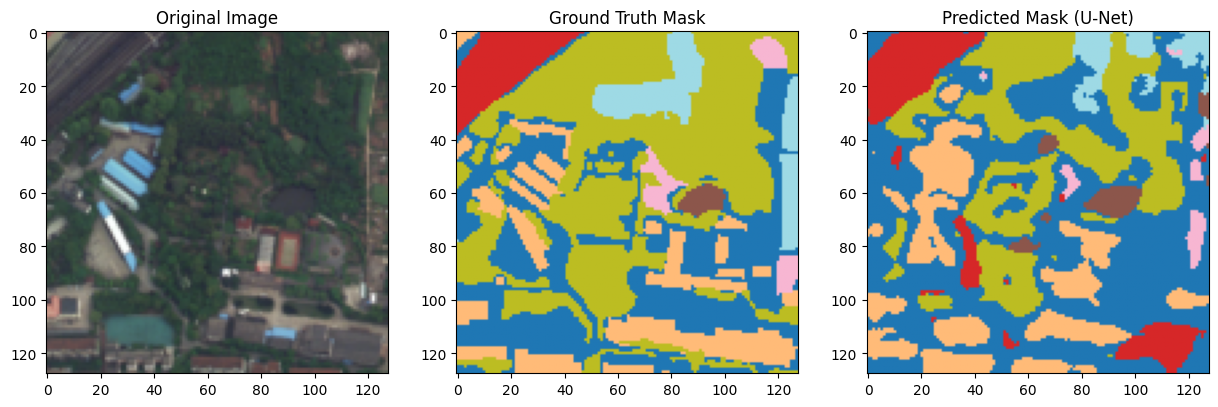

In [107]:
# --- 7. Predict and visualize ---
idx = 30
# English: This line selects the index of the image from the test set to be used for prediction and visualization.
# ภาษาไทย: เป็นการกำหนดตัวแปรเพื่อเลือกรูปภาพและ mask จากชุดข้อมูลทดสอบในตำแหน่งที่เราต้องการ เพื่อนำมาใช้ในการทดลองทำนายและแสดงผลลัพธ์

img = X_test[idx]
# English: This line retrieves the selected image from the test dataset.
# ภาษาไทย: เป็นการดึงรูปภาพต้นฉบับออกมาจากชุดข้อมูลทดสอบ (X_test) เพื่อนำไปใช้เป็นข้อมูลสำหรับการทำนาย

mask_true = np.argmax(y_test[idx], axis=-1)
# English: This line converts the one-hot encoded true mask back into its original class-based format, making it easier to visualize.
# ภาษาไทย: เป็นการแปลงข้อมูล mask ที่อยู่ในรูปแบบ one-hot encoding ให้กลับเป็นค่าตัวเลขคลาสปกติ (0, 1, 2...) เพื่อให้ง่ายต่อการนำไปแสดงผลและเปรียบเทียบกับผลลัพธ์ที่โมเดลทำนายได้

pred_probs = model.predict(img[None, ...])
# English: This line uses the trained model to predict the segmentation mask for the selected image. The `[None, ...]` is used to add a batch dimension to the image.
# ภาษาไทย: เป็นการใช้โมเดลที่เราฝึกแล้วมาทำนายผลลัพธ์จากรูปภาพที่เราเลือก โดย `[None, ...]` เป็นการเพิ่มมิติให้กับรูปภาพให้มีขนาด (1, H, W, C) เพื่อให้โมเดลสามารถรับข้อมูลในรูปแบบที่ถูกต้องได้

mask_pred = np.argmax(pred_probs[0], axis=-1)
# English: This line converts the predicted probabilities into a single class prediction for each pixel by selecting the class with the highest probability.
# ภาษาไทย: เป็นการแปลงผลลัพธ์ที่โมเดลทำนายออกมา ซึ่งเป็นค่าความน่าจะเป็นของแต่ละพิกเซลในแต่ละคลาส ให้เป็นค่าตัวเลขคลาสเดี่ยวสำหรับแต่ละพิกเซล โดยจะเลือกคลาสที่มีค่าความน่าจะเป็นสูงสุด

plt.figure(figsize=(15,5))
# English: This line creates a figure for plotting with a specified size.
# ภาษาไทย: เป็นการสร้างพื้นที่สำหรับวาดรูปภาพ โดยกำหนดขนาดให้มีความกว้าง 15 นิ้ว และความสูง 5 นิ้ว เพื่อให้รูปภาพที่แสดงผลมีขนาดที่เหมาะสม

plt.subplot(1,3,1)
# English: This line creates a subplot within the figure, specifying a 1-row, 3-column layout, and selecting the first plot.
# ภาษาไทย: เป็นการสร้างพื้นที่ย่อยสำหรับแสดงรูปภาพภายในพื้นที่หลัก โดยจะแบ่งพื้นที่ออกเป็น 1 แถว 3 คอลัมน์ และเลือกตำแหน่งที่ 1 เพื่อแสดงรูปภาพต้นฉบับ

plt.imshow(img)
# English: This line displays the original image on the first subplot.
# ภาษาไทย: เป็นคำสั่งที่ใช้แสดงรูปภาพต้นฉบับที่เราเลือกไว้ใน subplot แรก

plt.title("Original Image")
# English: This line sets the title for the first subplot.
# ภาษาไทย: เป็นการตั้งชื่อหัวข้อให้กับรูปภาพแรกที่แสดงผล เพื่อบอกให้รู้ว่าเป็นรูปภาพต้นฉบับ

plt.subplot(1,3,2)
# English: This line selects the second subplot for displaying the true mask.
# ภาษาไทย: เป็นการเลือกตำแหน่งที่ 2 เพื่อแสดงไฟล์ mask ที่เป็นคำตอบที่ถูกต้อง

plt.imshow(mask_true, cmap='tab20')
# English: This line displays the true mask with a specific color map to differentiate between classes.
# ภาษาไทย: เป็นการแสดงไฟล์ mask ที่เป็นคำตอบที่ถูกต้อง โดยใช้ 'cmap' หรือ color map ที่แตกต่างกันเพื่อแสดงสีของแต่ละคลาสให้ดูง่าย

plt.title("Ground Truth Mask")
# English: This line sets the title for the second subplot.
# ภาษาไทย: เป็นการตั้งชื่อหัวข้อให้กับรูปภาพที่สอง เพื่อบอกให้รู้ว่าเป็นไฟล์ mask ที่ถูกต้อง

plt.subplot(1,3,3)
# English: This line selects the third subplot for displaying the predicted mask.
# ภาษาไทย: เป็นการเลือกตำแหน่งที่ 3 เพื่อแสดงไฟล์ mask ที่ได้จากการทำนายของโมเดล

plt.imshow(mask_pred, cmap='tab20')
# English: This line displays the predicted mask with the same color map to enable a direct comparison.
# ภาษาไทย: เป็นการแสดงไฟล์ mask ที่ได้จากการทำนายของโมเดล โดยใช้ color map เดียวกันกับ mask ที่ถูกต้อง เพื่อให้สามารถเปรียบเทียบผลลัพธ์ของโมเดลกับความจริงได้ง่ายขึ้น

plt.title("Predicted Mask (U-Net)")
# English: This line sets the title for the third subplot.
# ภาษาไทย: เป็นการตั้งชื่อหัวข้อให้กับรูปภาพที่สาม เพื่อบอกให้รู้ว่าเป็นไฟล์ mask ที่โมเดล U-Net ทำนายออกมา

plt.show()
# English: This line displays all the created subplots in a single figure.
# ภาษาไทย: เป็นคำสั่งที่ใช้แสดงรูปภาพทั้งหมดที่สร้างขึ้นมาในหน้าจอเดียว

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Pixel-wise Accuracy: 0.6326575185738358

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    118877
           1       0.51      0.46      0.48    373677
           2       0.56      0.76      0.64    191034
           3       0.73      0.49      0.58     99650
           4       0.71      0.77      0.74    167182
           5       0.57      0.33      0.42    105156
           6       0.67      0.43      0.52    176343
           7       0.63      0.76      0.69    439249

    accuracy                           0.63   1671168
   macro avg       0.67      0.62      0.63   1671168
weighted avg       0.63      0.63      0.62   1671168



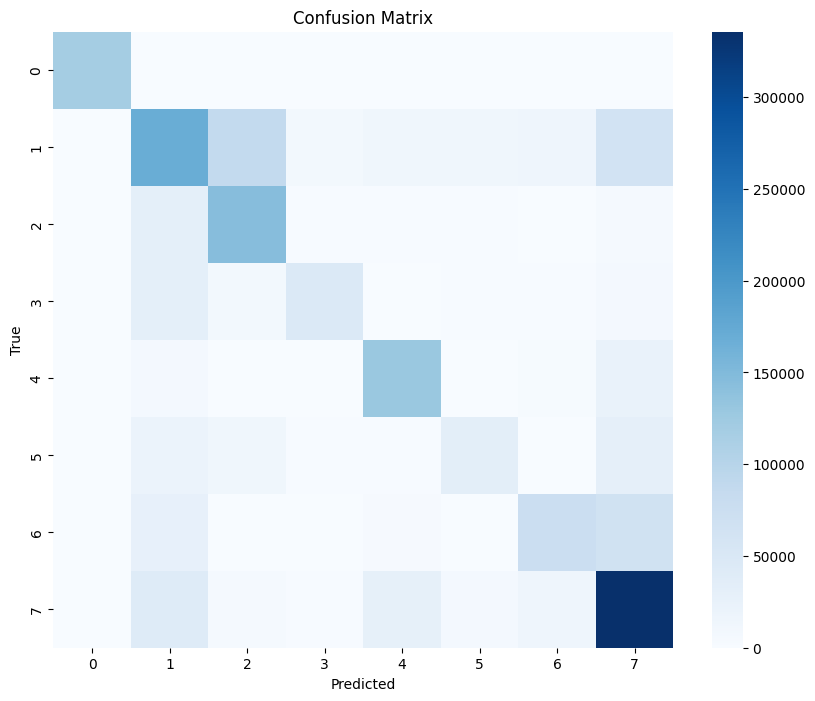

In [109]:
# --- 8. Pixel-wise metrics ---
y_test_flat = np.argmax(y_test.reshape(-1, num_classes), axis=-1)
# English: This line flattens the true masks from a 3D shape (N, H, W) to a 1D array of class labels, which is necessary for calculating pixel-wise metrics.
# ภาษาไทย: เป็นการปรับเปลี่ยนขนาด (reshape) ของข้อมูล mask ที่เป็นคำตอบที่ถูกต้อง โดยการแปลงจากอาเรย์หลายมิติให้เป็นอาเรย์หนึ่งมิติ (1D) ซึ่งจำเป็นต้องทำเพื่อนำไปคำนวณค่าตัวชี้วัดต่างๆ เช่น Accuracy และ Classification Report

y_pred_flat = np.argmax(model.predict(X_test).reshape(-1, num_classes), axis=-1)
# English: This line flattens the model's predicted output and converts it to a 1D array of class labels for evaluation purposes.
# ภาษาไทย: เป็นการทำนายผลลัพธ์จากชุดข้อมูลทดสอบ (X_test) จากนั้นจึงทำการปรับขนาดข้อมูลผลลัพธ์ที่ได้ให้เป็นอาเรย์หนึ่งมิติเช่นเดียวกับ y_test_flat เพื่อให้สามารถนำมาเปรียบเทียบและคำนวณค่าความแม่นยำได้

print("Pixel-wise Accuracy:", accuracy_score(y_test_flat, y_pred_flat))
# English: This line calculates and prints the overall pixel-wise accuracy, which measures the percentage of correctly classified pixels.
# ภาษาไทย: เป็นการคำนวณและแสดงค่าความแม่นยำ (Accuracy) โดยจะคำนวณจากจำนวนพิกเซลที่โมเดลทำนายได้ถูกต้องหารด้วยจำนวนพิกเซลทั้งหมด ซึ่งเป็นตัวชี้วัดที่ง่ายที่สุดในการดูประสิทธิภาพของโมเดล

print("\nClassification Report:\n", classification_report(y_test_flat, y_pred_flat))
# English: This line generates a comprehensive report showing the precision, recall, and F1-score for each class.
# ภาษาไทย: เป็นการสร้างรายงานสรุปผลลัพธ์ (Classification Report) ที่มีความละเอียดมากกว่าค่า Accuracy โดยจะแสดงค่า Precision, Recall, และ F1-score ของแต่ละคลาส ทำให้เราทราบประสิทธิภาพของโมเดลในแต่ละคลาสอย่างชัดเจน

cm = confusion_matrix(y_test_flat, y_pred_flat)
# English: This line computes the confusion matrix, which is a table that shows the number of correct and incorrect predictions for each class.
# ภาษาไทย: เป็นการสร้างตารางความสับสน (Confusion Matrix) ซึ่งเป็นตารางที่แสดงให้เห็นว่าโมเดลทำนายได้ถูกต้องและผิดพลาดอย่างไรในแต่ละคลาส เพื่อให้เราเห็นภาพรวมว่าโมเดลสับสนระหว่างคลาสใดบ้าง

plt.figure(figsize=(10,8))
# English: This line creates a figure for plotting the confusion matrix with a specified size.
# ภาษาไทย: เป็นการสร้างพื้นที่สำหรับวาดรูปภาพ โดยกำหนดขนาดให้มีความกว้าง 10 นิ้ว และความสูง 8 นิ้ว เพื่อให้รูปภาพที่แสดงผลมีขนาดที่เหมาะสมและอ่านง่าย

sns.heatmap(cm, annot=False, cmap="Blues")
# English: This line uses the Seaborn library to create a heatmap visualization of the confusion matrix, making the data easier to interpret.
# ภาษาไทย: เป็นการใช้ไลบรารี Seaborn ในการสร้าง heatmap จากตารางความสับสน (cm) ที่สร้างขึ้นมา เพื่อแสดงผลข้อมูลในรูปแบบของสี ซึ่งทำให้เราเข้าใจผลลัพธ์ของโมเดลได้ง่ายขึ้น

plt.title("Confusion Matrix")
# English: This line sets the title for the plot.
# ภาษาไทย: เป็นการตั้งชื่อหัวข้อให้กับกราฟ เพื่ออธิบายว่ากราฟที่แสดงคืออะไร

plt.xlabel("Predicted")
# English: This line labels the x-axis of the plot as "Predicted."
# ภาษาไทย: เป็นการกำหนดชื่อแกน X เพื่อแสดงถึงคลาสที่โมเดลทำนาย

plt.ylabel("True")
# English: This line labels the y-axis of the plot as "True."
# ภาษาไทย: เป็นการกำหนดชื่อแกน Y เพื่อแสดงถึงคลาสที่เป็นคำตอบที่ถูกต้อง

plt.show()
# English: This line displays the generated plot.
# ภาษาไทย: เป็นคำสั่งที่ใช้แสดงกราฟที่สร้างขึ้นมาทั้งหมดในหน้าจอเดียว